# Apriory Algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"D:\Data Science\Datasets\groceries - groceries.csv")
data.head(3)

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(9835, 33)

In [4]:
data.isnull().sum()

Item(s)       0
Item 1        0
Item 2     2159
Item 3     3802
Item 4     5101
Item 5     6106
Item 6     6961
Item 7     7606
Item 8     8151
Item 9     8589
Item 10    8939
Item 11    9185
Item 12    9367
Item 13    9484
Item 14    9562
Item 15    9639
Item 16    9694
Item 17    9740
Item 18    9769
Item 19    9783
Item 20    9797
Item 21    9806
Item 22    9817
Item 23    9821
Item 24    9827
Item 25    9828
Item 26    9828
Item 27    9829
Item 28    9830
Item 29    9831
Item 30    9834
Item 31    9834
Item 32    9834
dtype: int64

**We need to remove NAN**
* But we cant direclty fill the missing value
* We need to do list over list [[a,b],[a,g]] like items purchased by costomer

Note : NaN is a floating while toher are sting

In [5]:
type(data['Item 1'][0])

str

In [6]:
type(data['Item 5'][0]) # this is NaN

float

So the simple technique to remove NaN is exctracting flot from it and make a list

In [7]:
market = []
for i in range(0,data.shape[0]):
    cus = []
    for j in data.columns :
        if type(data[j][i]) == str:
            cus.append(data[j][i])
    market.append(cus) #This will have list undet list

This is the list of market without NaN value (list under list)

In [8]:
market

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

**Next target** is to find most frequently buyed product

In [9]:
import collections

In [10]:
collections.Counter(market)

TypeError: unhashable type: 'list'

As this requier single list but we have list under list, so we will convert that into single list

In [11]:
import numpy as np

In [13]:
single_list = []
for i in market:
    for j in i:
        single_list.append(j)

In [14]:
single_list

['citrus fruit',
 'semi-finished bread',
 'margarine',
 'ready soups',
 'tropical fruit',
 'yogurt',
 'coffee',
 'whole milk',
 'pip fruit',
 'yogurt',
 'cream cheese',
 'meat spreads',
 'other vegetables',
 'whole milk',
 'condensed milk',
 'long life bakery product',
 'whole milk',
 'butter',
 'yogurt',
 'rice',
 'abrasive cleaner',
 'rolls/buns',
 'other vegetables',
 'UHT-milk',
 'rolls/buns',
 'bottled beer',
 'liquor (appetizer)',
 'potted plants',
 'whole milk',
 'cereals',
 'tropical fruit',
 'other vegetables',
 'white bread',
 'bottled water',
 'chocolate',
 'citrus fruit',
 'tropical fruit',
 'whole milk',
 'butter',
 'curd',
 'yogurt',
 'flour',
 'bottled water',
 'dishes',
 'beef',
 'frankfurter',
 'rolls/buns',
 'soda',
 'chicken',
 'tropical fruit',
 'butter',
 'sugar',
 'fruit/vegetable juice',
 'newspapers',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'other vegetables',
 'butter milk',
 'pastry',
 'whole milk',
 'tropical f

In [15]:
collections.Counter(single_list)

Counter({'whole milk': 2513,
         'other vegetables': 1903,
         'rolls/buns': 1809,
         'soda': 1715,
         'yogurt': 1372,
         'bottled water': 1087,
         'root vegetables': 1072,
         'tropical fruit': 1032,
         'shopping bags': 969,
         'sausage': 924,
         'pastry': 875,
         'citrus fruit': 814,
         'bottled beer': 792,
         'newspapers': 785,
         'canned beer': 764,
         'pip fruit': 744,
         'fruit/vegetable juice': 711,
         'whipped/sour cream': 705,
         'brown bread': 638,
         'domestic eggs': 624,
         'frankfurter': 580,
         'margarine': 576,
         'coffee': 571,
         'pork': 567,
         'butter': 545,
         'curd': 524,
         'beef': 516,
         'napkins': 515,
         'chocolate': 488,
         'frozen vegetables': 473,
         'chicken': 422,
         'white bread': 414,
         'cream cheese': 390,
         'waffles': 378,
         'salty snack': 372,
      

In [16]:
p = collections.Counter(single_list)

In [17]:
d = {'Item Names': p.keys(), 'Values': p.values()}

In [18]:
pd.set_option('display.max_rows', 200)

In [19]:
pd.DataFrame(d).sort_values(by = ['Values'], ascending = False)

,Item Names,Values
7,whole milk,2513
11,other vegetables,1903
17,rolls/buns,1809
31,soda,1715
5,yogurt,1372
24,bottled water,1087
42,root vegetables,1072
4,tropical fruit,1032
52,shopping bags,969
50,sausage,924


Till now we didn't use Apriory algorithm, we just finded the most selling product

Now we will use Assosiations, ie to find the bought together items

* We know the Apriory algothm will create a matrix of person(A,B,C) (rows) items(a,b,c)(columns)
* i. it will tell use the frequncy pattern of items bought by persons
* 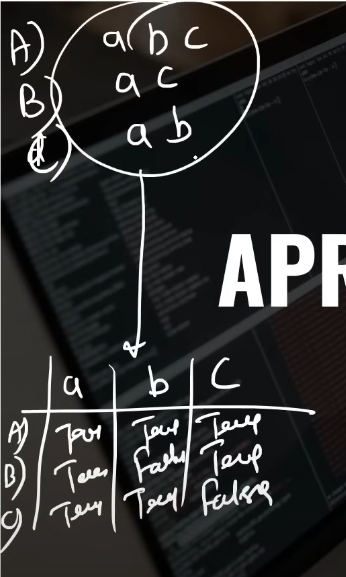

In [20]:
from mlxtend.preprocessing.transactionencoder import TransactionEncoder

In [22]:
tr = TransactionEncoder()
tr.fit(market)

TransactionEncoder()

In [24]:
tr.transform(market)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

* So this is the matrix we will use in Apriori algorithm in the form of DataFrame

In [26]:
df = pd.DataFrame(tr.transform(market), columns = tr.columns_)

In [27]:
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


We are ready for Apriory algorithm

In [28]:
from mlxtend.frequent_patterns import apriori

In [38]:
apriori(df, min_support = 0.07, use_colnames=True, max_len=3) # We kept min_support very low beacuse in larger data chances of repeatation is very low

,support,itemsets
0,0.080529,(bottled beer)
1,0.110524,(bottled water)
2,0.077682,(canned beer)
3,0.082766,(citrus fruit)
4,0.072293,(fruit/vegetable juice)
5,0.079817,(newspapers)
6,0.193493,(other vegetables)
7,0.088968,(pastry)
8,0.075648,(pip fruit)
9,0.183935,(rolls/buns)


As we are looking for combination of product  
But here we only got 3 at 4,9,15,18 
So change the support

after applying apriori algorithm 
some values im geting in shlash i.e item1/item2
and some item1,item2

what does this mean


ChatGPT said:
Great question! After applying the Apriori algorithm, you're seeing results like:

item1/item2

item1, item2

Let’s clarify what they mean:

🔹 item1, item2
This format usually means a frequent itemset — just a group of items that frequently occur together in transactions.

Example:

Copy code
milk, bread
means that milk and bread often appear together in many baskets/transactions.

🔸 item1 / item2
This format usually indicates an association rule, and specifically:

nginx
Copy code
item2 ⇒ item1
It means: if item2 is present, then item1 is likely to also be present.

Example:

nginx
Copy code
butter / bread
means:
If a customer buys bread, they are also likely to buy butter.
This is an association rule, with:

Antecedent (LHS): bread

Consequent (RHS): butter

💡 Why the Confusion?
Depending on the tool or library you're using (like mlxtend, Orange, Weka, etc.), the way frequent itemsets and rules are displayed or formatted might differ.

Some use / or -> to show rules.

Some show plain item1, item2 for itemsets.

✅ Quick Summary
Format	Meaning	Interpretation
item1, item2	Frequent Itemset	These items occur together often
item1 / item2	Association Rule (item2 ⇒ item1)	If item2 is bought, item1 is likely too

If you show me a few actual lines from your output, I can interpret them more precisely.







You said:
so apriory algothim is just for / ryt


ChatGPT said:
Great follow-up!

❓ Is Apriori only for generating / (i.e., association rules)?
No — Apriori does both:

✅ 1. Frequent Itemset Generation (item1, item2)
Goal: Find groups of items that appear together frequently in the dataset.

Example output:

Copy code
milk, bread
Means: Milk and bread were bought together frequently (support above a threshold).

This is Step 1 of the Apriori algorithm.

✅ 2. Association Rule Mining (item1 / item2 or item1 ⇒ item2)
Goal: From frequent itemsets, generate rules like:

nginx
Copy code
bread ⇒ butter
Meaning: If someone buys bread, they’re likely to buy butter.

This is Step 2, and requires thresholds like:

Confidence

Lift (optional but useful)

Support

📌 So in short:
Output Format	Comes from	Purpose
item1, item2	Frequent Itemsets	Find co-occurring items
item1 / item2	Association Rules	Predict one item from another

🔄 Flow of Apriori:
Scan data to find frequent itemsets → milk, bread

Use these to build association rules → milk ⇒ bread

Let me know if you're using a library like mlxtend or Orange, I can show you the exact functions used in each step.









In [45]:
apriori(df, min_support = 0.05, use_colnames=True, max_len=3).sort_values(by='support')

,support,itemsets
13,0.052364,(napkins)
0,0.052466,(beef)
8,0.053279,(curd)
4,0.055414,(butter)
30,0.056024,"(yogurt, whole milk)"
29,0.056634,"(rolls/buns, whole milk)"
18,0.057651,(pork)
7,0.058058,(coffee)
12,0.058566,(margarine)
10,0.058973,(frankfurter)


So we can keep other vegitable with whole milk 